In [42]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
import re
#nltk.download('vader_lexicon')
from nltk.corpus import stopwords
import string
# Load Vader and TextBlob libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nilup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nilup\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
#load the data from csv file
CSR_Data = pd.read_csv("ExtractedData_withGreenAndLiveObj.csv")

In [44]:
#Check dimentions
CSR_Data.shape

(7673, 8)

In [45]:
#Check features
CSR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   File_Name          7673 non-null   object 
 1   Image_Name         7673 non-null   object 
 2   PageNumber         7673 non-null   int64  
 3   Text_Before        2051 non-null   object 
 4   Text_After         3041 non-null   object 
 5   Text_Inside_Image  698 non-null    object 
 6   green_perc         7673 non-null   float64
 7   live_obj           7673 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 427.2+ KB


In [46]:
CSR_Data.head(50)

,File_Name,Image_Name,PageNumber,Text_Before,Text_After,Text_Inside_Image,green_perc,live_obj
0,3M_2017.pdf,page_2_image_1.png,2,Improving every life\nA desirable location for...,It takes a community\n3M Legal Affairs pro bon...,NaN,48.451031,False
1,3M_2017.pdf,page_2_image_2.png,2,NaN,NaN,NaN,3.916912,False
2,3M_2017.pdf,page_2_image_3.png,2,Improving every life\nIt takes a community\nSe...,NaN,NaN,0.497178,True
3,3M_2017.pdf,page_2_image_4.png,2,NaN,NaN,oe “” This isn’t the end.\nr It’s just the beg...,1.870898,False
4,3M_2017.pdf,page_2_image_5.png,2,NaN,NaN,NaN,1.762538,False
5,3M_2017.pdf,page_2_image_6.png,2,NaN,NaN,NaN,0.557439,False
6,3M_2017.pdf,page_2_image_7.png,2,NaN,NaN,NaN,6.668862,True
7,3M_2017.pdf,page_2_image_8.png,2,NaN,NaN,NaN,0.002419,False
8,3M_2017.pdf,page_3_image_1.png,3,Contents\nWho We\nEvery Life\nOur Leadership\n...,NaN,NaN,0.226020,True
9,3M_2017.pdf,page_3_image_2.png,3,Contents\nEvery Life\nOur Leadership,Introduction\nGlobal Challenges\nMessage from ...,NaN,0.499214,False


In [47]:
#Check null values in the dataset
CSR_Data.isnull().sum()

File_Name               0
Image_Name              0
PageNumber              0
Text_Before          5622
Text_After           4632
Text_Inside_Image    6975
green_perc              0
live_obj                0
dtype: int64

In [48]:
#drop na values
#CSR_Data = CSR_Data.dropna()

In [49]:
#Check null values in the dataset
CSR_Data.isnull().sum()

File_Name               0
Image_Name              0
PageNumber              0
Text_Before          5622
Text_After           4632
Text_Inside_Image    6975
green_perc              0
live_obj                0
dtype: int64

In [50]:
CSR_Data.head(50)

,File_Name,Image_Name,PageNumber,Text_Before,Text_After,Text_Inside_Image,green_perc,live_obj
0,3M_2017.pdf,page_2_image_1.png,2,Improving every life\nA desirable location for...,It takes a community\n3M Legal Affairs pro bon...,NaN,48.451031,False
1,3M_2017.pdf,page_2_image_2.png,2,NaN,NaN,NaN,3.916912,False
2,3M_2017.pdf,page_2_image_3.png,2,Improving every life\nIt takes a community\nSe...,NaN,NaN,0.497178,True
3,3M_2017.pdf,page_2_image_4.png,2,NaN,NaN,oe “” This isn’t the end.\nr It’s just the beg...,1.870898,False
4,3M_2017.pdf,page_2_image_5.png,2,NaN,NaN,NaN,1.762538,False
5,3M_2017.pdf,page_2_image_6.png,2,NaN,NaN,NaN,0.557439,False
6,3M_2017.pdf,page_2_image_7.png,2,NaN,NaN,NaN,6.668862,True
7,3M_2017.pdf,page_2_image_8.png,2,NaN,NaN,NaN,0.002419,False
8,3M_2017.pdf,page_3_image_1.png,3,Contents\nWho We\nEvery Life\nOur Leadership\n...,NaN,NaN,0.226020,True
9,3M_2017.pdf,page_3_image_2.png,3,Contents\nEvery Life\nOur Leadership,Introduction\nGlobal Challenges\nMessage from ...,NaN,0.499214,False


In [51]:
# check value counts in city column
CSR_Data.value_counts()

File_Name                       Image_Name             PageNumber  Text_Before                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Text_After                                                                                                                                                                                                                

In [52]:
#Define stop words
stop_words = set(stopwords.words('english'))


# Define the function for text cleaning
def clean_text(text):
    # Convert text to lowercase
        #text = text.lower() 
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Remove the stop words from both Positive_Review and Negative_Review columns
CSR_Data.Text_Before = CSR_Data.Text_Before.apply(clean_text)   
CSR_Data.Text_After= CSR_Data.Text_After.apply(clean_text)
CSR_Data.Text_Inside_Image= CSR_Data.Text_Inside_Image.apply(clean_text)


In [53]:
# Create the vader sentiment analyser 
vader_sentiment = SentimentIntensityAnalyzer()

# Calculate the Vadar SentimentSocre
def calculate_sentiment_score_vadar(Text_Before, Text_After):
    Text_Before_score = 0.0
    Text_After_score = 0.0
      

    if Text_Before:
        sentiment_Text_Before = vader_sentiment.polarity_scores(Text_Before)
        Text_Before_score = sentiment_Text_Before['compound']

    if Text_After:
        sentiment_Text_After = vader_sentiment.polarity_scores(Text_After)
        Text_After_score = sentiment_Text_After['compound']
    

    sentiment_score = Text_Before_score + Text_After_score 
    return sentiment_score


In [54]:
# Calculate the Vadar SentimentSocre
def calculate_sentiment_score_vadar_inside_image(Text_Inside_Image):
    if Text_Inside_Image is not None:
        try:
            sentiment_Text_Inside_Image = vader_sentiment.polarity_scores(Text_Inside_Image)
            Text_inside_sentiment_score = sentiment_Text_Inside_Image['compound']
        except Exception as e:
            print(f"An error occurred: {e}")
    return Text_inside_sentiment_score

In [55]:
print("Calculating sentiment")

# Create a new column 'Sentiment_Score' and assign the calculated scores
CSR_Data['Text_Before'] = CSR_Data['Text_Before'].apply(clean_text)
CSR_Data['Text_After'] = CSR_Data['Text_After'].apply(clean_text)
CSR_Data['Text_Inside_Image'] = CSR_Data['Text_Inside_Image'].apply(clean_text)


Calculating sentiment


In [56]:
CSR_Data['Sentiment_Score_text_before_after_image'] = CSR_Data.apply(lambda row: calculate_sentiment_score_vadar(row['Text_Before'], row['Text_After']), axis=1)


In [57]:
CSR_Data['Sentiment_Score_text_inside_image'] = CSR_Data.apply(lambda row: calculate_sentiment_score_vadar_inside_image(row['Text_Inside_Image']), axis=1)


In [58]:
CSR_Data.head(10)

,File_Name,Image_Name,PageNumber,Text_Before,Text_After,Text_Inside_Image,green_perc,live_obj,Sentiment_Score_text_before_after_image,Sentiment_Score_text_inside_image
0,3M_2017.pdf,page_2_image_1.png,2,improving every life desirable location millen...,takes community 3m legal affairs pro bono work...,nan,48.451031,False,0.9682,0.0
1,3M_2017.pdf,page_2_image_2.png,2,nan,nan,nan,3.916912,False,0.0000,0.0
2,3M_2017.pdf,page_2_image_3.png,2,improving every life takes community setting a...,nan,nan,0.497178,True,0.9493,0.0
3,3M_2017.pdf,page_2_image_4.png,2,nan,nan,oe “” isn’t end r it’s beginning,1.870898,False,0.0000,0.0
4,3M_2017.pdf,page_2_image_5.png,2,nan,nan,nan,1.762538,False,0.0000,0.0
5,3M_2017.pdf,page_2_image_6.png,2,nan,nan,nan,0.557439,False,0.0000,0.0
6,3M_2017.pdf,page_2_image_7.png,2,nan,nan,nan,6.668862,True,0.0000,0.0
7,3M_2017.pdf,page_2_image_8.png,2,nan,nan,nan,0.002419,False,0.0000,0.0
8,3M_2017.pdf,page_3_image_1.png,3,contents every life leadership introduction co...,nan,nan,0.226020,True,0.6597,0.0
9,3M_2017.pdf,page_3_image_2.png,3,contents every life leadership,introduction global challenges message ceo mes...,nan,0.499214,False,0.0772,0.0


In [59]:
GRI_Data = pd.read_csv("gri_csvfile.csv")

C:\Users\nilup\AppData\Local\Temp\ipykernel_31920\4217884581.py:1: DtypeWarning: Columns (14,15,36,39) have mixed types. Specify dtype option on import or set low_memory=False.
  GRI_Data = pd.read_csv("gri_csvfile.csv")


In [60]:
GRI_Data.head(10)

,Unnamed: 0,Name,Size,Sector,Country,Country_Status,Region,Date_Added,Title,Publication_Year,...,file,txtfile,Sec_SASB,Legal_origin,LO_binary,Year,textcat,cld2,cld3,english_non_english
0,1,Procter & Gamble,Large,Household and Personal Products,United States of America,OECD,Northern America,10-12-2010,Sustainability Report 1999,1999,...,Procter&Gamble_1999,1,Consumer Goods,English,Common,1999,english,en,en,english
1,2,Banrisul,Large,Financial Services,Brazil,DAC-UMICT,Latin America & the Caribbean,7-1-2013,Balanço Social 1999,2000,...,Banrisul_2000,1,Financials,French,Civil,2000,NaN,NaN,ja,non-english
2,3,Hitachi High-Technologies Corp.,MNE,Conglomerates,Japan,OECD,Asia,11-9-2015,CSR Report 2009,2000,...,HitachiHigh-TechnologiesCorp._2000,1,Conglomerates,German,Civil,2000,english,en,en,english
3,4,Procter & Gamble,Large,Household and Personal Products,United States of America,OECD,Northern America,10-12-2010,Sustainability Report 2000,2000,...,Procter&Gamble_2000,1,Consumer Goods,English,Common,2000,english,en,en,english
4,5,Vancity,Large,Financial Services,Canada,OECD,Northern America,6-2-2009,1998-99 Social Report,2000,...,Vancity_2000,1,Financials,English,Common,2000,english,en,en,english
5,6,Aspen Snowmass,SME,Tourism/Leisure,United States of America,OECD,Northern America,11-2-2016,Sustainability Report 1999-2000,2001,...,AspenSnowmass_2001,1,Tourism/Leisure,English,Common,2001,english,en,en,english
6,7,Banrisul,Large,Financial Services,Brazil,DAC-UMICT,Latin America & the Caribbean,7-1-2013,Balanço Social 2000,2001,...,Banrisul_2001,1,Financials,French,Civil,2001,portuguese,pt,pt,non-english
7,8,Ericsson,Large,Telecommunications,Sweden,OECD,Europe,12-11-2008,Sustainability Report 2001,2001,...,Ericsson_2001,1,Technology and Communications,Scandinavian,Civil,2001,english,en,en,english
8,9,Nichicon,Large,Equipment,Japan,OECD,Asia,20-10-2015,Environmental Report 2001,2001,...,Nichicon_2001,1,Resource Transformation,German,Civil,2001,english,en,en,english
9,10,Procter & Gamble,Large,Household and Personal Products,United States of America,OECD,Northern America,10-12-2010,Sustainability Report 2001,2001,...,Procter&Gamble_2001,1,Consumer Goods,English,Common,2001,english,en,en,english


In [61]:
CSR_Data['File_Name'] = CSR_Data['File_Name'].str.replace('.pdf', '', case=False)

In [62]:
CSR_Data.head(10)

,File_Name,Image_Name,PageNumber,Text_Before,Text_After,Text_Inside_Image,green_perc,live_obj,Sentiment_Score_text_before_after_image,Sentiment_Score_text_inside_image
0,3M_2017,page_2_image_1.png,2,improving every life desirable location millen...,takes community 3m legal affairs pro bono work...,nan,48.451031,False,0.9682,0.0
1,3M_2017,page_2_image_2.png,2,nan,nan,nan,3.916912,False,0.0000,0.0
2,3M_2017,page_2_image_3.png,2,improving every life takes community setting a...,nan,nan,0.497178,True,0.9493,0.0
3,3M_2017,page_2_image_4.png,2,nan,nan,oe “” isn’t end r it’s beginning,1.870898,False,0.0000,0.0
4,3M_2017,page_2_image_5.png,2,nan,nan,nan,1.762538,False,0.0000,0.0
5,3M_2017,page_2_image_6.png,2,nan,nan,nan,0.557439,False,0.0000,0.0
6,3M_2017,page_2_image_7.png,2,nan,nan,nan,6.668862,True,0.0000,0.0
7,3M_2017,page_2_image_8.png,2,nan,nan,nan,0.002419,False,0.0000,0.0
8,3M_2017,page_3_image_1.png,3,contents every life leadership introduction co...,nan,nan,0.226020,True,0.6597,0.0
9,3M_2017,page_3_image_2.png,3,contents every life leadership,introduction global challenges message ceo mes...,nan,0.499214,False,0.0772,0.0


In [63]:
GRI_Data['File_Name'] = GRI_Data['file']

In [64]:
CSR_MERGE = CSR_Data.merge(GRI_Data, on=['File_Name'], how='left')

In [65]:
CSR_MERGE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   File_Name                                      7673 non-null   object 
 1   Image_Name                                     7673 non-null   object 
 2   PageNumber                                     7673 non-null   int64  
 3   Text_Before                                    7673 non-null   object 
 4   Text_After                                     7673 non-null   object 
 5   Text_Inside_Image                              7673 non-null   object 
 6   green_perc                                     7673 non-null   float64
 7   live_obj                                       7673 non-null   bool   
 8   Sentiment_Score_text_before_after_image        7673 non-null   float64
 9   Sentiment_Score_text_inside_image              7673 

In [66]:
CSR_MERGE.head()

,File_Name,Image_Name,PageNumber,Text_Before,Text_After,Text_Inside_Image,green_perc,live_obj,Sentiment_Score_text_before_after_image,Sentiment_Score_text_inside_image,...,file,txtfile,Sec_SASB,Legal_origin,LO_binary,Year,textcat,cld2,cld3,english_non_english
0,3M_2017,page_2_image_1.png,2,improving every life desirable location millen...,takes community 3m legal affairs pro bono work...,nan,48.451031,False,0.9682,0.0,...,3M_2017,1,Conglomerates,English,Common,2017,english,en,en,english
1,3M_2017,page_2_image_2.png,2,nan,nan,nan,3.916912,False,0.0000,0.0,...,3M_2017,1,Conglomerates,English,Common,2017,english,en,en,english
2,3M_2017,page_2_image_3.png,2,improving every life takes community setting a...,nan,nan,0.497178,True,0.9493,0.0,...,3M_2017,1,Conglomerates,English,Common,2017,english,en,en,english
3,3M_2017,page_2_image_4.png,2,nan,nan,oe “” isn’t end r it’s beginning,1.870898,False,0.0000,0.0,...,3M_2017,1,Conglomerates,English,Common,2017,english,en,en,english
4,3M_2017,page_2_image_5.png,2,nan,nan,nan,1.762538,False,0.0000,0.0,...,3M_2017,1,Conglomerates,English,Common,2017,english,en,en,english


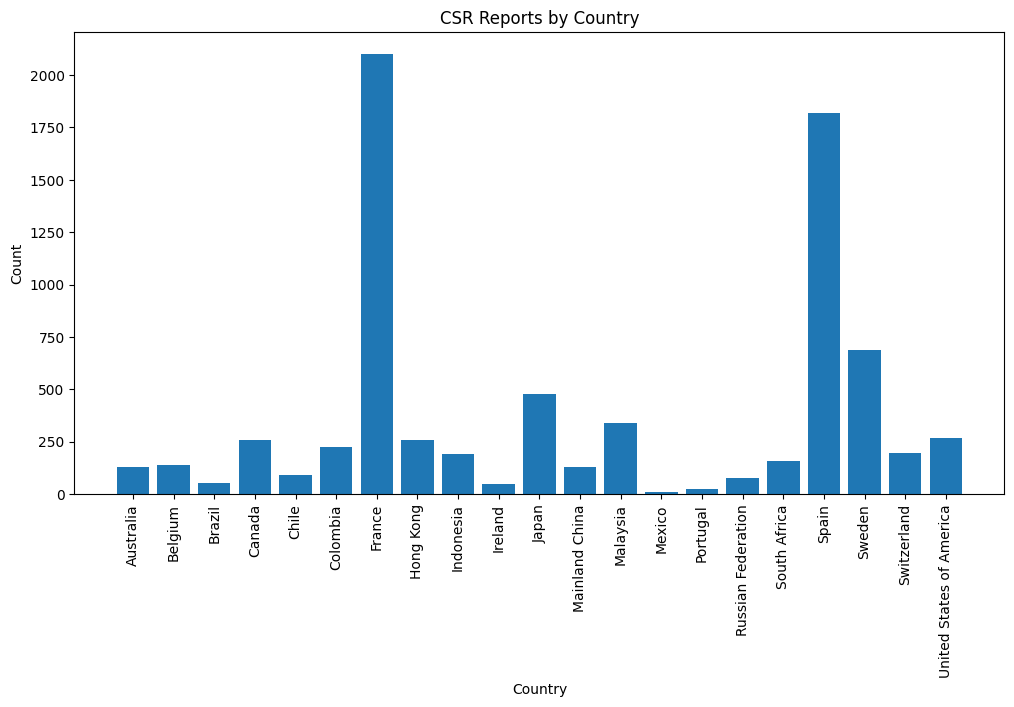

In [67]:
# Assuming you have a DataFrame named 'df' with a 'country' column
grouped = CSR_MERGE.groupby('Country').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.bar(grouped['Country'], grouped['count'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('CSR Reports by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

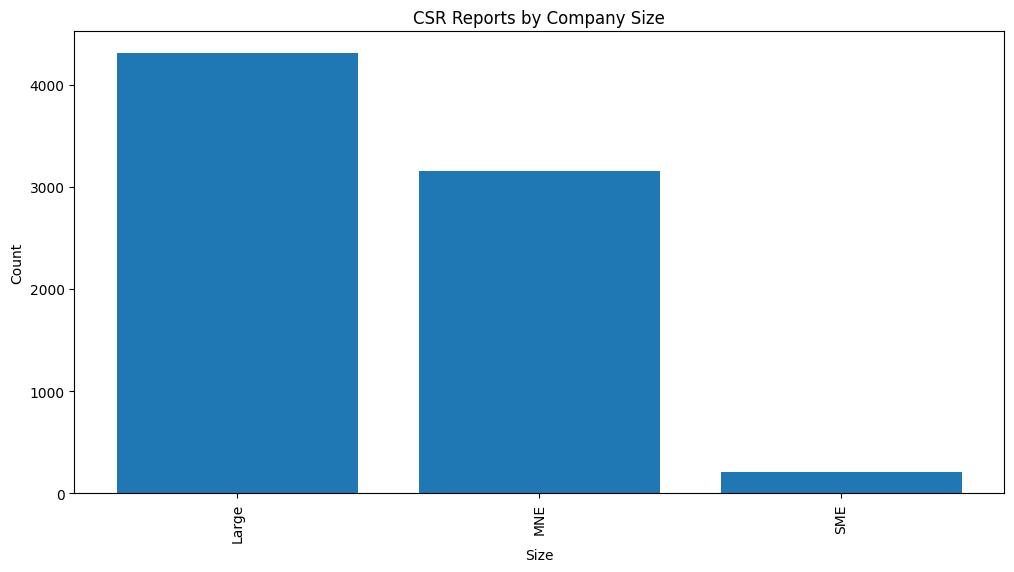

In [68]:
# Assuming you have a DataFrame named 'df' with a 'country' column
grouped = CSR_MERGE.groupby('Size').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.bar(grouped['Size'], grouped['count'])
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('CSR Reports by Company Size')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

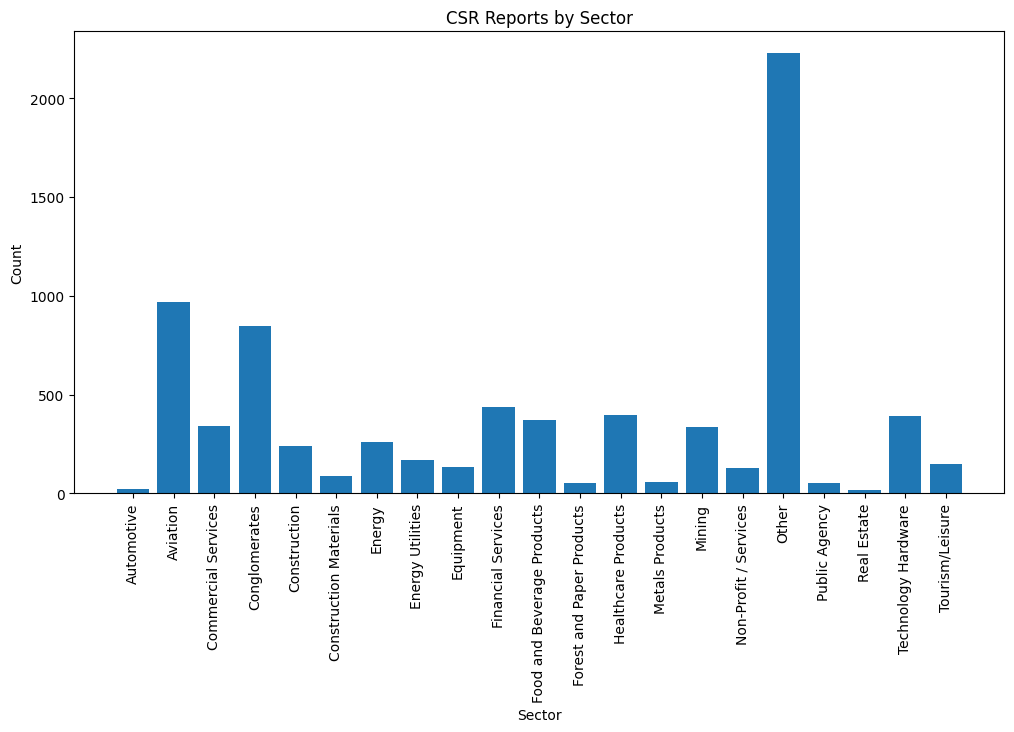

In [69]:
# Assuming you have a DataFrame named 'df' with a 'country' column
grouped = CSR_MERGE.groupby('Sector').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.bar(grouped['Sector'], grouped['count'])
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('CSR Reports by Sector')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

C:\Users\nilup\AppData\Local\Temp\ipykernel_31920\484761106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sector', y='Sentiment_Score_text_before_after_image', data=sector_sentiment, palette=custom_palette)


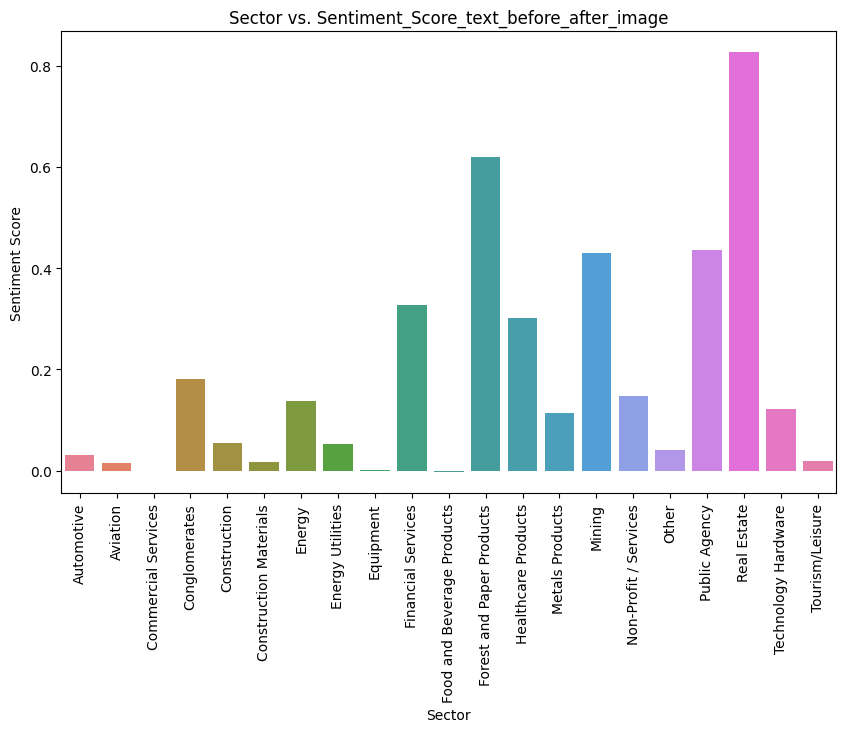

In [70]:
# Group by 'Sector' and calculate the mean sentiment score for each sector
sector_sentiment = CSR_MERGE.groupby('Sector')['Sentiment_Score_text_before_after_image'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector', y='Sentiment_Score_text_before_after_image', data=sector_sentiment, palette=custom_palette)
plt.title('Sector vs. Sentiment_Score_text_before_after_image')
plt.xlabel('Sector')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Score')
plt.show()

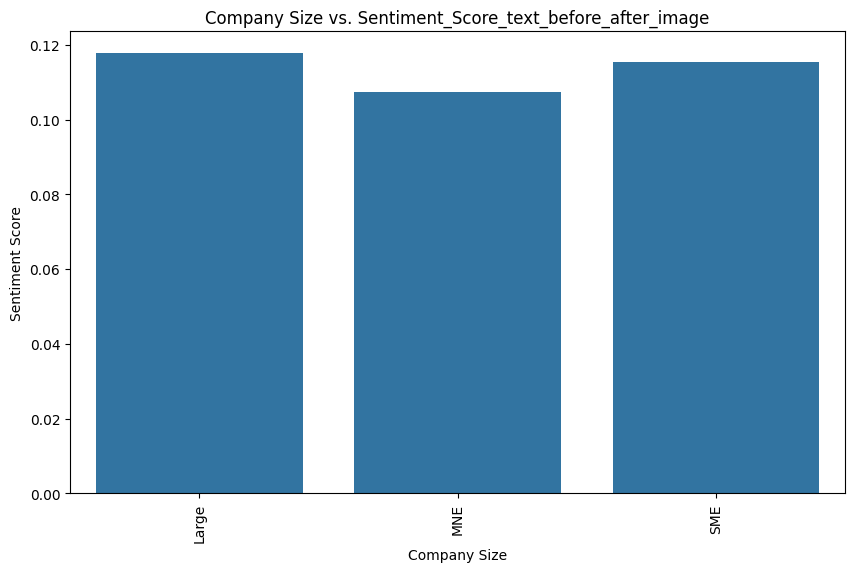

In [71]:
# Group by 'Size' and calculate the mean sentiment score for each Size
sector_sentiment = CSR_MERGE.groupby('Size')['Sentiment_Score_text_before_after_image'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Size', y='Sentiment_Score_text_before_after_image', data=sector_sentiment)
plt.title('Company Size vs. Sentiment_Score_text_before_after_image')
plt.xlabel('Company Size')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Score')
plt.show()

C:\Users\nilup\AppData\Local\Temp\ipykernel_31920\2635553788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sector', y='Sentiment_Score_text_inside_image', data=sector_sentiment, palette=custom_palette)


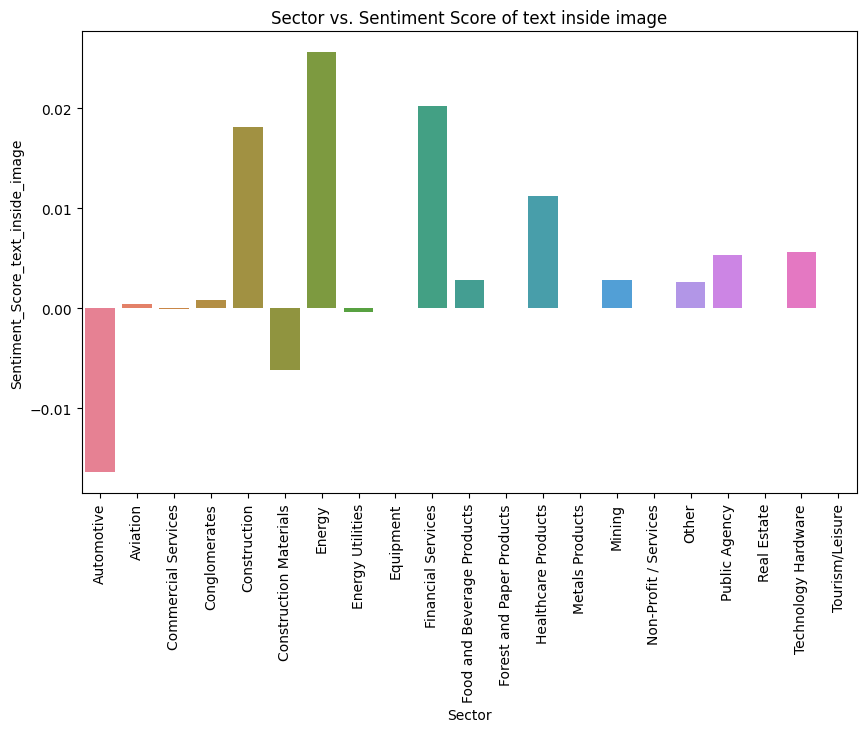

In [72]:
# Group by 'Sector' and calculate the mean sentiment score for each sector
sector_sentiment = CSR_MERGE.groupby('Sector')['Sentiment_Score_text_inside_image'].mean().reset_index()

custom_palette = "husl"
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector', y='Sentiment_Score_text_inside_image', data=sector_sentiment, palette=custom_palette)
plt.title('Sector vs. Sentiment Score of text inside image')
plt.xlabel('Sector')
plt.xticks(rotation=90)
plt.ylabel('Sentiment_Score_text_inside_image')
plt.show()

C:\Users\nilup\AppData\Local\Temp\ipykernel_31920\1181738831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size', y='Sentiment_Score_text_inside_image', data=sector_sentiment, palette=custom_palette)


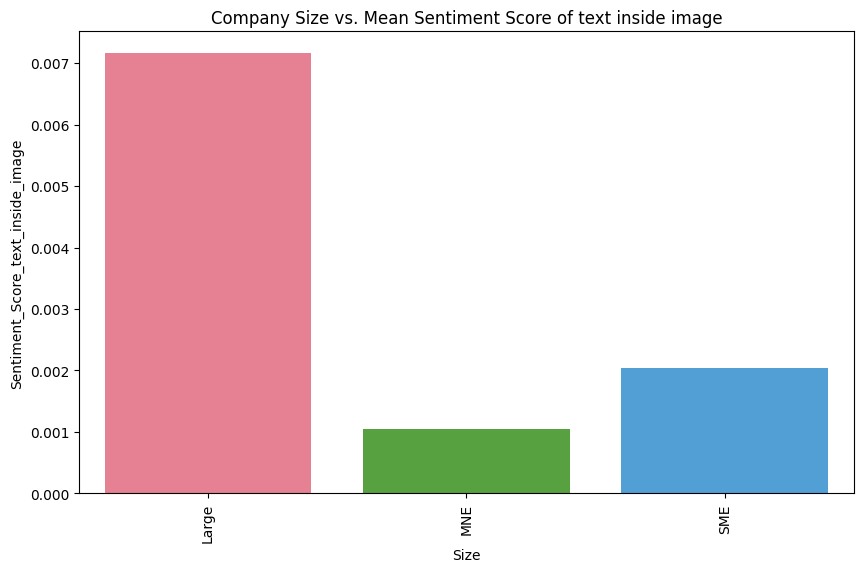

In [73]:
# Group by 'Sector' and calculate the mean sentiment score for each sector
sector_sentiment = CSR_MERGE.groupby('Size')['Sentiment_Score_text_inside_image'].mean().reset_index()

custom_palette = "husl"
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Size', y='Sentiment_Score_text_inside_image', data=sector_sentiment, palette=custom_palette)
plt.title('Company Size vs. Mean Sentiment Score of text inside image')
plt.xlabel('Size')
plt.xticks(rotation=90)
plt.ylabel('Sentiment_Score_text_inside_image')
plt.show()

C:\Users\nilup\AppData\Local\Temp\ipykernel_25476\3218098634.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Sentiment_Score_text_inside_image', data=sector_sentiment, palette=custom_palette)


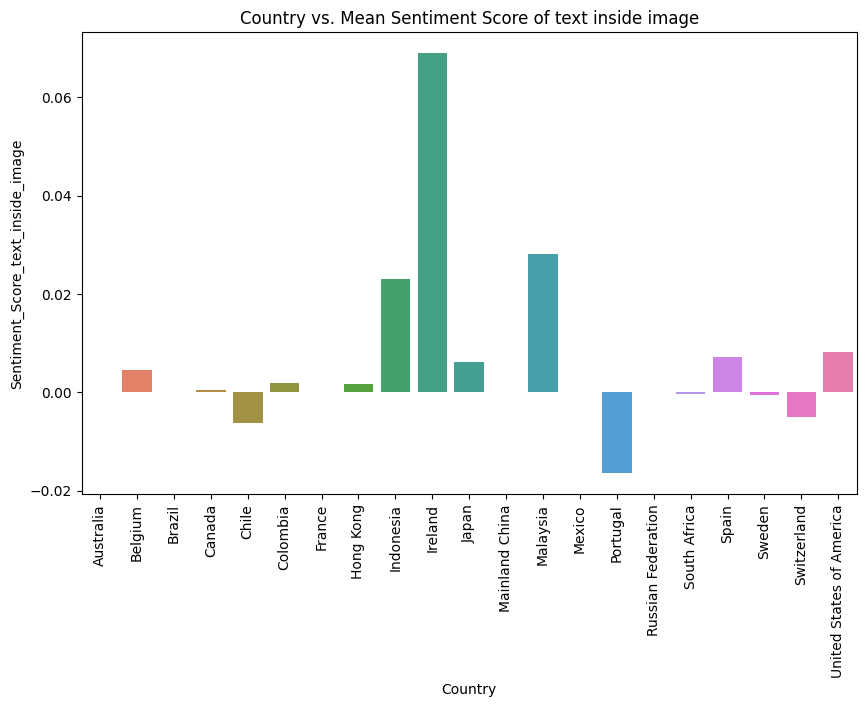

In [41]:
# Group by 'Sector' and calculate the mean sentiment score for each sector
sector_sentiment = CSR_MERGE.groupby('Country')['Sentiment_Score_text_inside_image'].mean().reset_index()

custom_palette = "husl"

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Sentiment_Score_text_inside_image', data=sector_sentiment, palette=custom_palette)
plt.title('Country vs. Mean Sentiment Score of text inside image')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Sentiment_Score_text_inside_image')
plt.show()

C:\Users\nilup\AppData\Local\Temp\ipykernel_31920\983972660.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='live_obj', y='Sentiment_Score_text_before_after_image', data=sector_sentiment, palette=custom_palette)


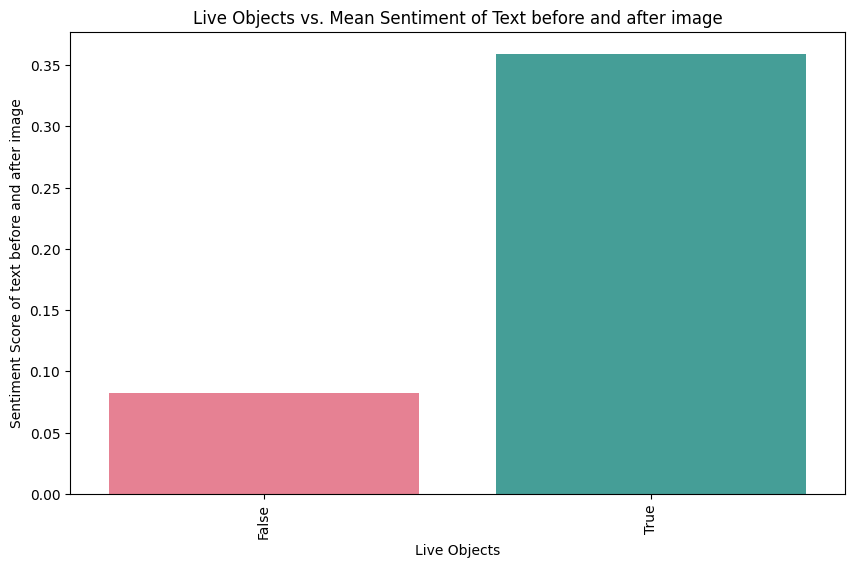

In [38]:
# Group by 'live_obj' and calculate the mean sentiment score for each sector
sector_sentiment = CSR_MERGE.groupby('live_obj')['Sentiment_Score_text_before_after_image'].mean().reset_index()

custom_palette = "husl" 
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='live_obj', y='Sentiment_Score_text_before_after_image', data=sector_sentiment, palette=custom_palette)
plt.title('Live Objects vs. Mean Sentiment of Text before and after image')
plt.xlabel('Live Objects')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Score of text before and after image')
plt.show()

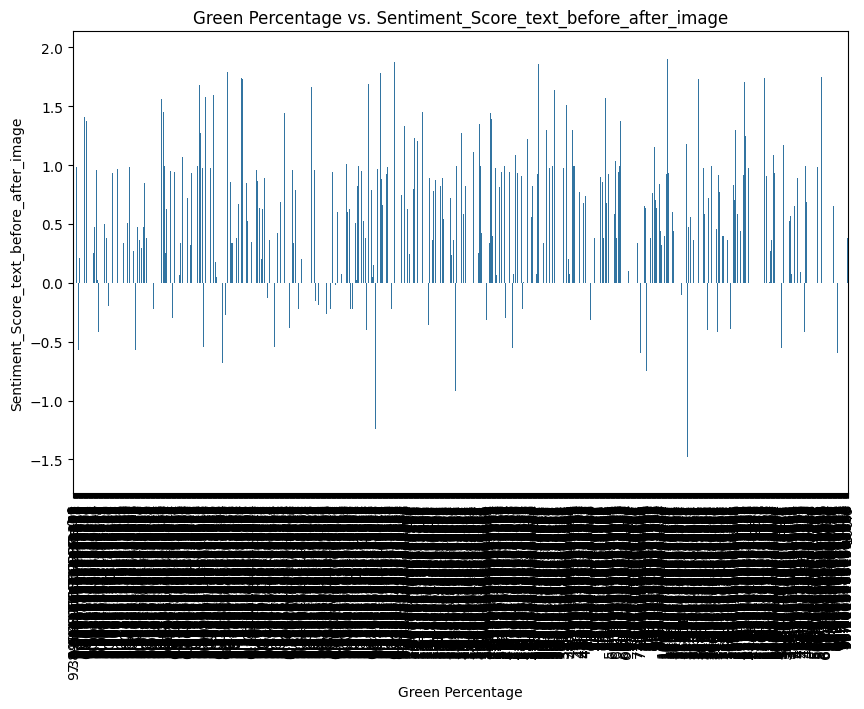

In [269]:
# Group by 'green_perc' and calculate the mean sentiment score for each sector
sector_sentiment = CSR_MERGE.groupby('green_perc')['Sentiment_Score_text_before_after_image'].mean().reset_index()

# Create a bar plotgreen_perc
plt.figure(figsize=(10, 6))
sns.barplot(x='green_perc', y='Sentiment_Score_text_before_after_image', data=sector_sentiment)
plt.title('Green Percentage vs. Sentiment_Score_text_before_after_image')
plt.xlabel('Green Percentage')
plt.xticks(rotation=90)
plt.ylabel('Sentiment_Score_text_before_after_image')
plt.show()

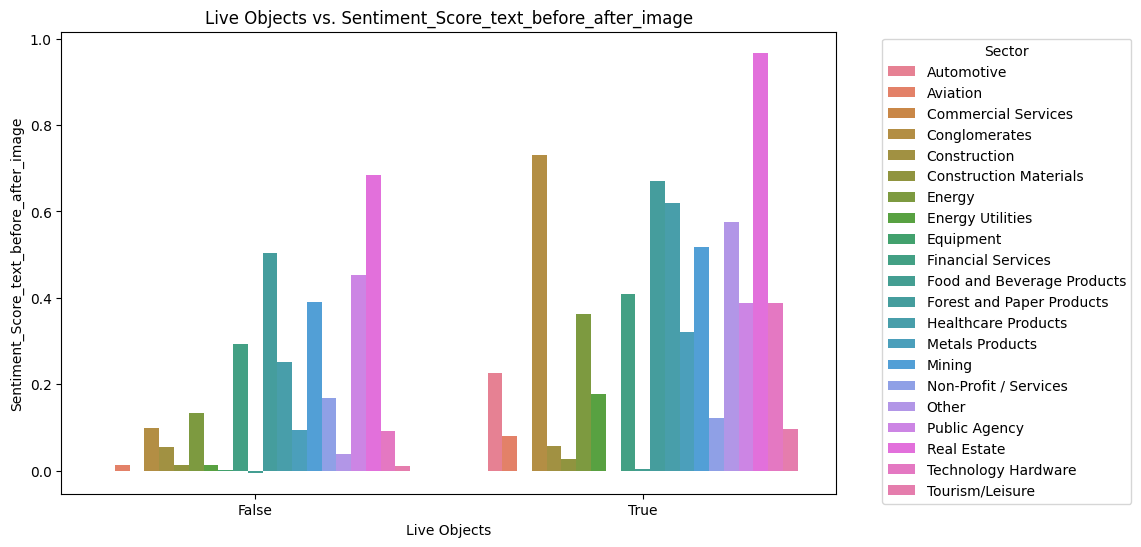

In [270]:
# Group by 'Sector' and 'live_obj' and calculate the mean sentiment score for each combination
sector_sentiment = CSR_MERGE.groupby(['Sector', 'live_obj'])['Sentiment_Score_text_before_after_image'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='live_obj', y='Sentiment_Score_text_before_after_image', hue='Sector', data=sector_sentiment)
plt.title('Live Objects vs. Sentiment_Score_text_before_after_image')
plt.xlabel('Live Objects')
plt.ylabel('Sentiment_Score_text_before_after_image')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

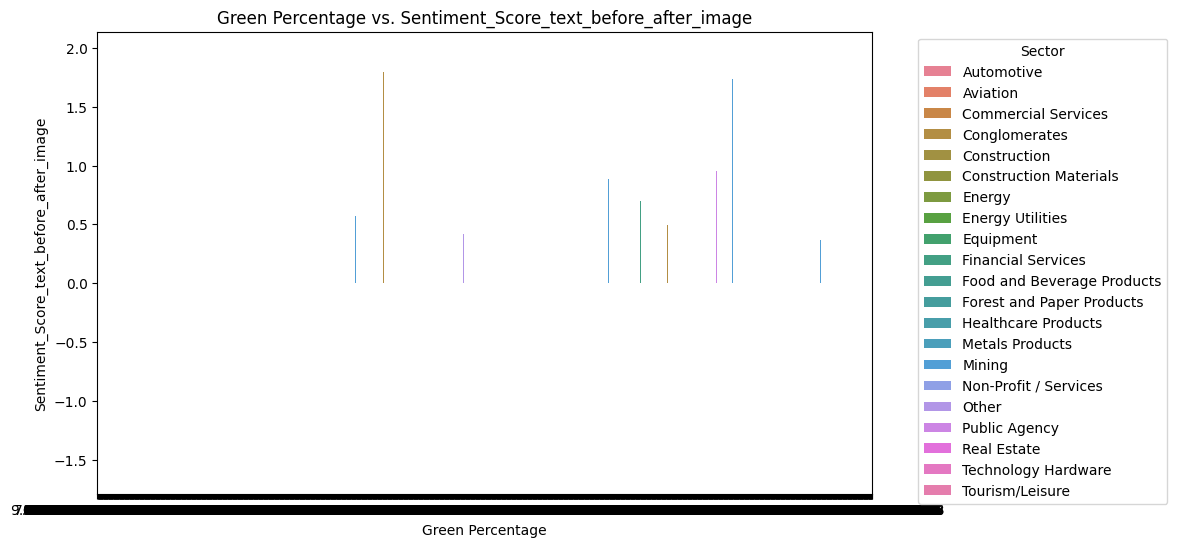

In [271]:
# Group by 'Sector' and 'live_obj' and calculate the mean sentiment score for each combination
sector_sentiment = CSR_MERGE.groupby(['Sector', 'green_perc'])['Sentiment_Score_text_before_after_image'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='green_perc', y='Sentiment_Score_text_before_after_image', hue='Sector', data=sector_sentiment)
plt.title('Green Percentage vs. Sentiment_Score_text_before_after_image')
plt.xlabel('Green Percentage')
plt.ylabel('Sentiment_Score_text_before_after_image')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [272]:
CSR_MERGE.to_csv('CSR_MERGE.csv', index=False)